In [ ]:
import pandas as pd

# Load the dataset
file_path = 'AirQualityUCI.xlsx'
data = pd.read_excel(file_path)

# Display the first few rows of the dataset
print(data.head())

# Display basic information about the dataset
print(data.info())

# Describe the dataset to get basic statistical details
print(data.describe())


        Date      Time  CO(GT)  PT08.S1(CO)  NMHC(GT)   C6H6(GT)  \
0 2004-03-10  18:00:00     2.6      1360.00       150  11.881723   
1 2004-03-10  19:00:00     2.0      1292.25       112   9.397165   
2 2004-03-10  20:00:00     2.2      1402.00        88   8.997817   
3 2004-03-10  21:00:00     2.2      1375.50        80   9.228796   
4 2004-03-10  22:00:00     1.6      1272.25        51   6.518224   

   PT08.S2(NMHC)  NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)  \
0        1045.50    166.0       1056.25    113.0       1692.00      1267.50   
1         954.75    103.0       1173.75     92.0       1558.75       972.25   
2         939.25    131.0       1140.00    114.0       1554.50      1074.00   
3         948.25    172.0       1092.00    122.0       1583.75      1203.25   
4         835.50    131.0       1205.00    116.0       1490.00      1110.00   

       T         RH        AH  
0  13.60  48.875001  0.757754  
1  13.30  47.700000  0.725487  
2  11.90  53.975000 

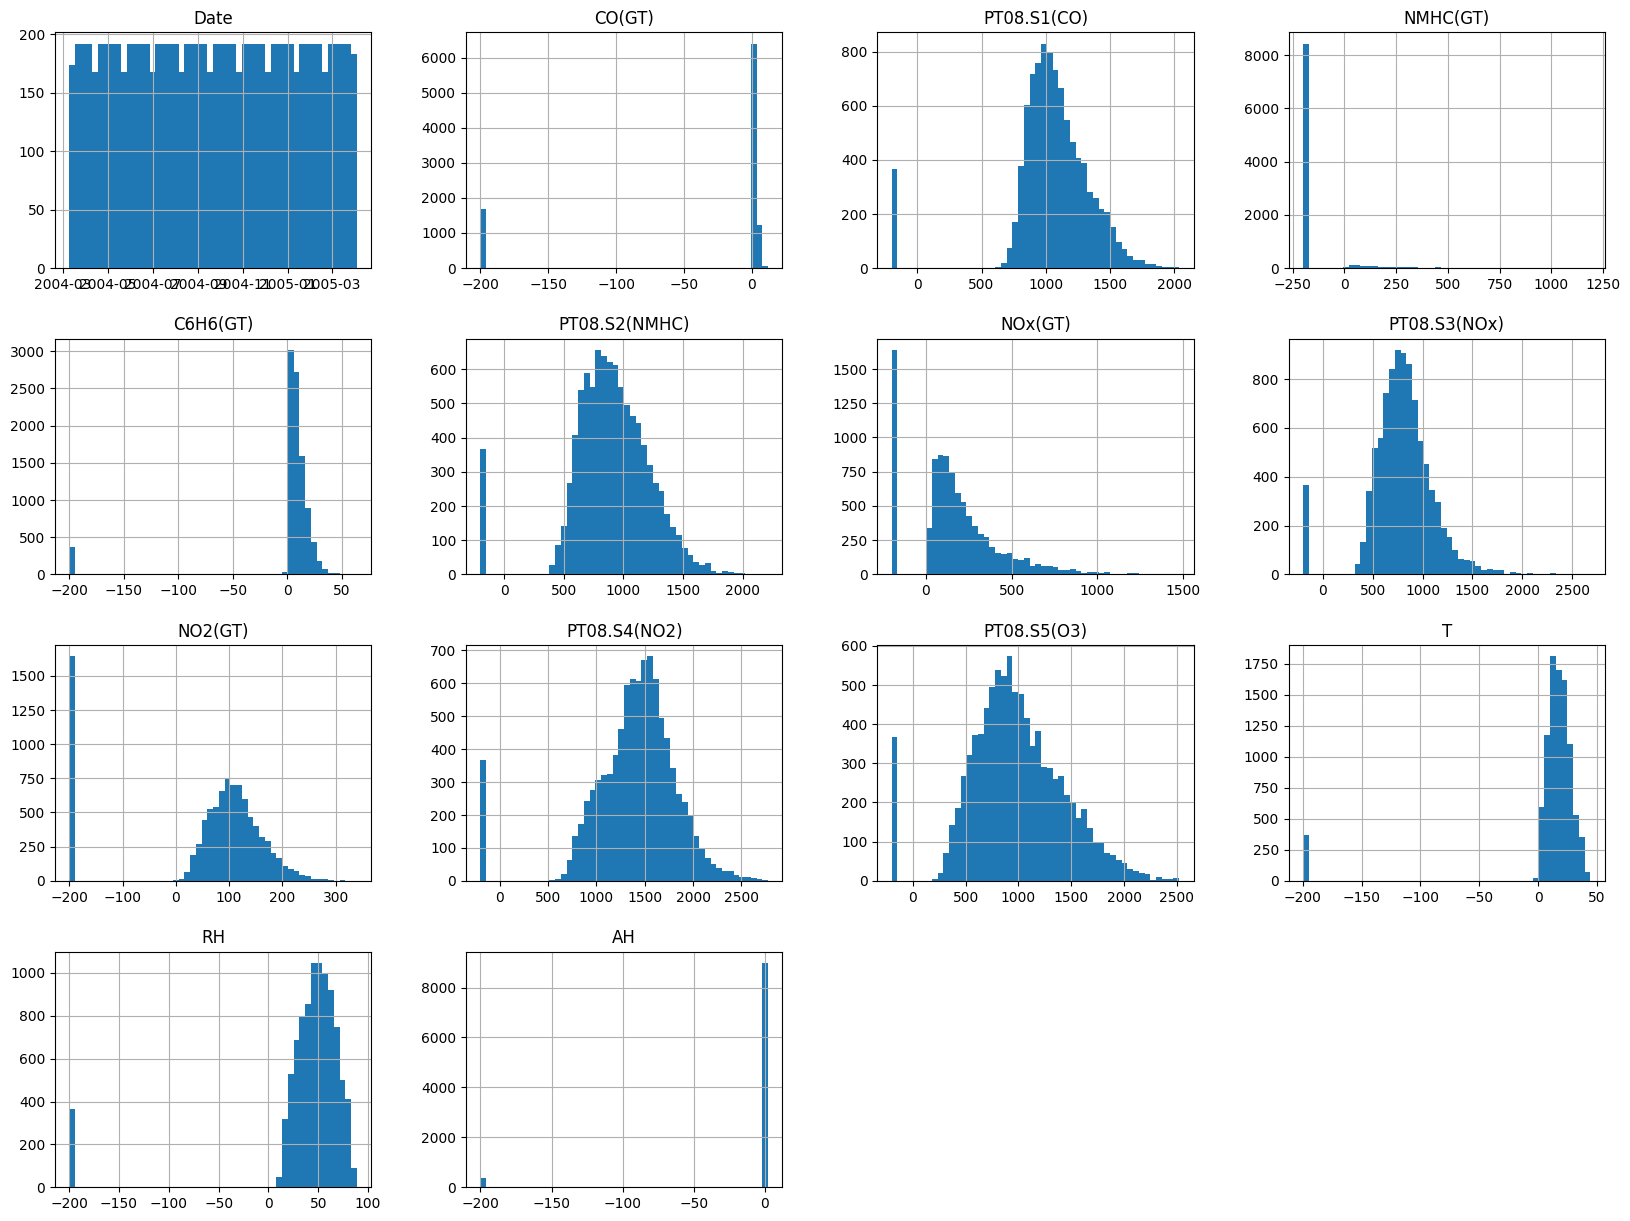

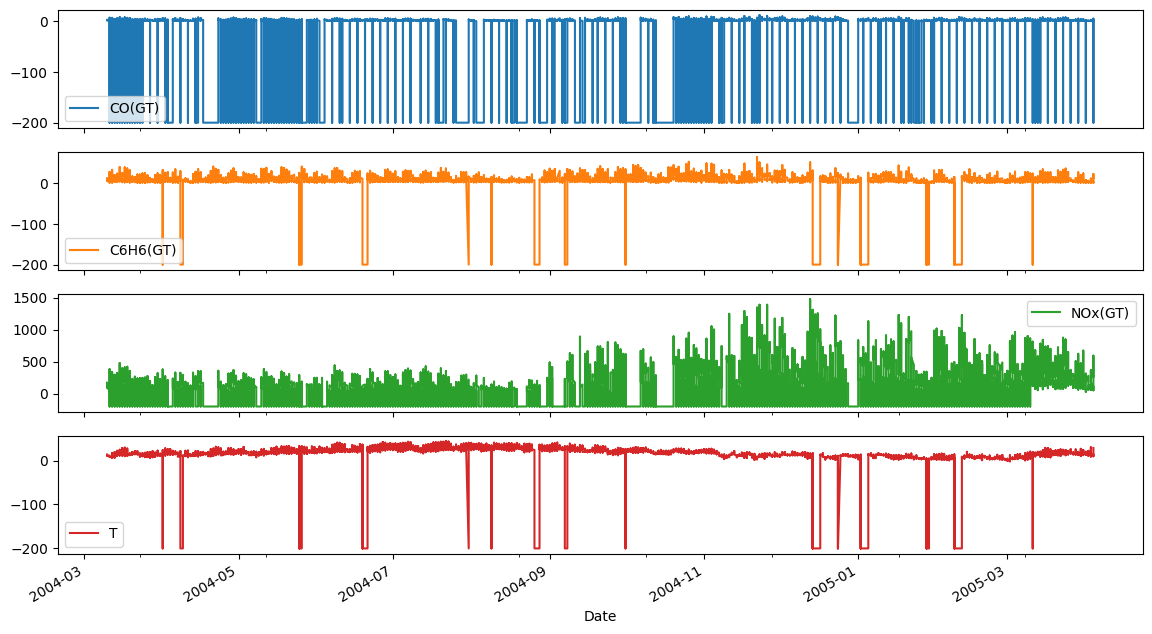

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting histograms for numerical columns
data.hist(bins=50, figsize=(20, 15))
plt.show()

# Time series plot for a few selected features
features = ['CO(GT)', 'C6H6(GT)', 'NOx(GT)', 'T']
data.plot(x='Date', y=features, subplots=True, figsize=(14, 8))
plt.show()


Mean Squared Error: 0.5672526588356754
R^2 Score: 0.9904703612637638
         Feature  Coefficient
0    PT08.S1(CO)    -0.003889
1  PT08.S2(NMHC)     0.028442
2   PT08.S3(NOx)     0.008578
3   PT08.S4(NO2)     0.008232
4    PT08.S5(O3)     0.000793
5              T    -0.112038
6             RH    -0.043490
7             AH     1.525858


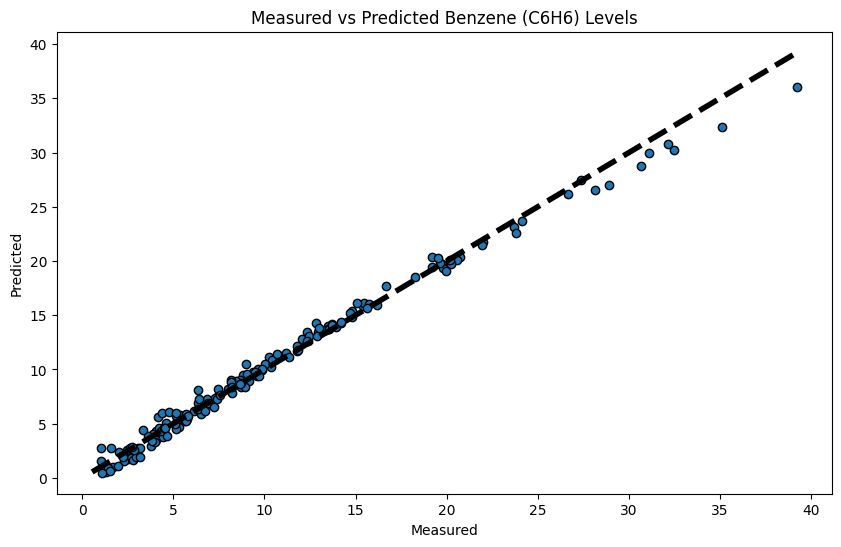

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import pandas as pd

# Load the dataset
file_path = 'AirQualityUCI.xlsx'
data = pd.read_excel(file_path)

# Replace negative values with NaNs
data.replace(-200, np.nan, inplace=True)

# Drop rows with NaN values
data.dropna(inplace=True)

# Select features and target variable
features = ['PT08.S1(CO)', 'PT08.S2(NMHC)', 'PT08.S3(NOx)', 'PT08.S4(NO2)', 'PT08.S5(O3)', 'T', 'RH', 'AH']
target = 'C6H6(GT)'

X = data[features]
y = data[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

# Print model coefficients
coefficients = pd.DataFrame({'Feature': features, 'Coefficient': model.coef_})
print(coefficients)

# Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, edgecolors=(0, 0, 0))
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
plt.xlabel('Measured')
plt.ylabel('Predicted')
plt.title('Measured vs Predicted Benzene (C6H6) Levels')
plt.show()
